In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1640


<Axes: xlabel='Time'>

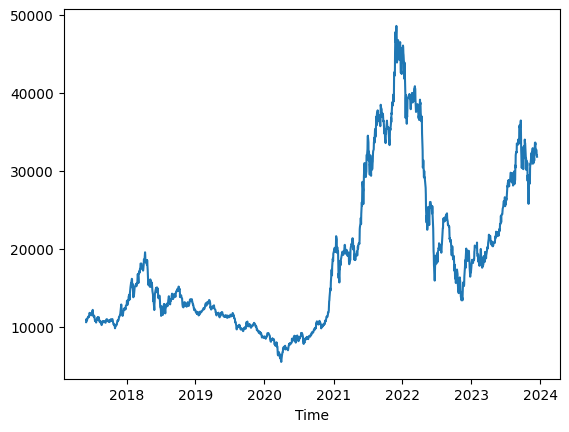

In [2]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [3]:
# Preprocessing
SSI['Lag'] = np.arange(len(SSI.index))
SSI = SSI[['Close', 'Lag']]
SSI

SSI = pd.DataFrame(SSI)
SSI.set_index("Lag", inplace= True)
SSI

,Close
Lag,
0,10570
1,10950
2,10740
3,10870
4,10980
...,...
1635,32700
1636,32600
1637,32000


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(SSI))
test_size = int(0.4 * len(SSI))

train_data = SSI[:train_size]
test_data = SSI[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[12048.76144042],
       [12048.70712211],
       [12048.65280379],
       [12048.59848547],
       [12048.54416716],
       [12048.48984884],
       [12048.43553052],
       [12048.38121221],
       [12048.32689389],
       [12048.27257557],
       [12048.21825726],
       [12048.16393894],
       [12048.10962062],
       [12048.05530231],
       [12048.00098399],
       [12047.94666567],
       [12047.89234736],
       [12047.83802904],
       [12047.78371072],
       [12047.72939241],
       [12047.67507409],
       [12047.62075577],
       [12047.56643746],
       [12047.51211914],
       [12047.45780082],
       [12047.40348251],
       [12047.34916419],
       [12047.29484587],
       [12047.24052756],
       [12047.18620924],
       [12047.13189092],
       [12047.07757261],
       [12047.02325429],
       [12046.96893597],
       [12046.91461766],
       [12046.86029934],
       [12046.80598102],
       [12046.75166271],
       [12046.69734439],
       [12046.64302607],


In [7]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[12013.12862469]
 [12013.07430637]
 [12013.01998805]
 [12012.96566974]
 [12012.91135142]
 [12012.8570331 ]
 [12012.80271479]
 [12012.74839647]
 [12012.69407815]
 [12012.63975984]
 [12012.58544152]
 [12012.5311232 ]
 [12012.47680489]
 [12012.42248657]
 [12012.36816825]
 [12012.31384994]
 [12012.25953162]
 [12012.2052133 ]
 [12012.15089499]
 [12012.09657667]
 [12012.04225835]
 [12011.98794004]
 [12011.93362172]
 [12011.8793034 ]
 [12011.82498509]
 [12011.77066677]
 [12011.71634845]
 [12011.66203014]
 [12011.60771182]
 [12011.5533935 ]
 [12011.49907519]
 [12011.44475687]
 [12011.39043855]
 [12011.33612024]
 [12011.28180192]
 [12011.2274836 ]
 [12011.17316529]
 [12011.11884697]
 [12011.06452865]
 [12011.01021034]
 [12010.95589202]
 [12010.9015737 ]
 [12010.84725539]
 [12010.79293707]
 [12010.73861875]
 [12010.68430044]
 [12010.62998212]
 [12010.5756638 ]
 [12010.52134549]
 [12010.46702717]
 [12010.41270885]
 [12010.35839054]
 [12010.30407222]

In [8]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 18139.375042007567
Testing MAPE: 52.99734467348897
Testing MAE: 16068.788479019002
MSLR:  0.7373351174247098


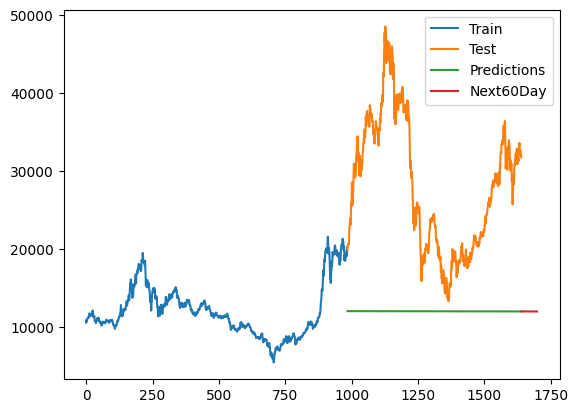

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()